(474, 1579)
--------------------------------
     Ageatdiagnosis  ECOG_Performance  Smoking_PY   Smoking  Drinking  \
411        0.850500         -0.653850   -0.987814 -0.056361  2.156745   
307       -0.844943          0.724466    0.012490  1.235049 -0.913500   
382        0.684848         -0.653850    0.012490  1.235049 -0.913500   
460        1.082015         -0.653850    1.212853  1.235049  0.314598   
438       -1.343896          0.724466   -0.627704 -0.056361 -0.299451   
408       -0.023666         -0.653850   -0.387632 -0.056361 -0.913500   
67        -1.027560         -0.653850    0.112520 -0.056361 -0.913500   
392        0.338574         -0.653850    0.812732  1.235049  0.314598   
503       -0.670309          0.724466   -0.987814 -1.347772  0.314598   
107        0.899398         -0.653850   -0.907789 -0.056361  0.314598   
237       -1.331921         -0.653850   -0.987814 -1.347772 -0.913500   
128        1.852398          2.102782   -0.987814 -1.347772  0.928647   
362   

[11:17:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:17:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:17:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:17:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:17:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

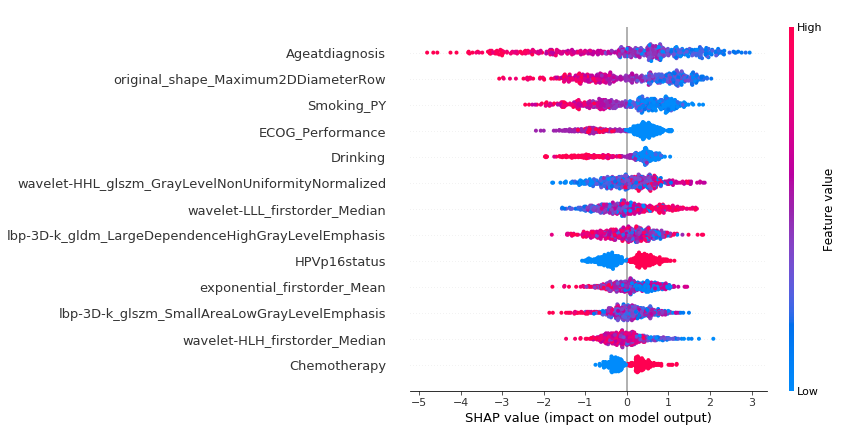

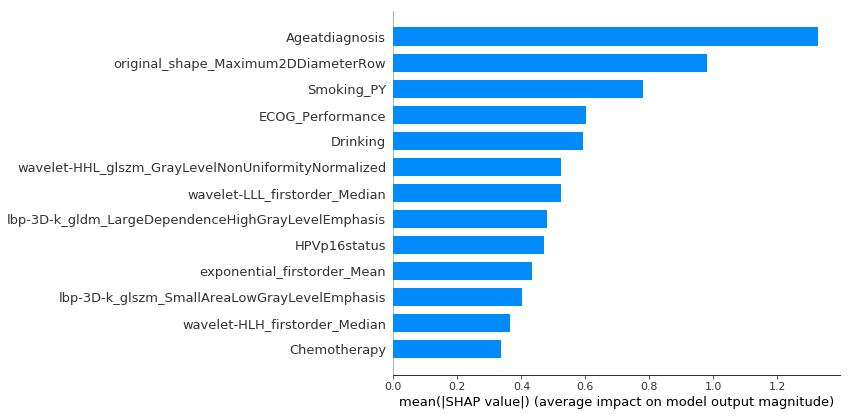

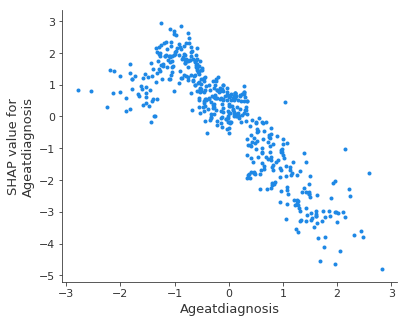

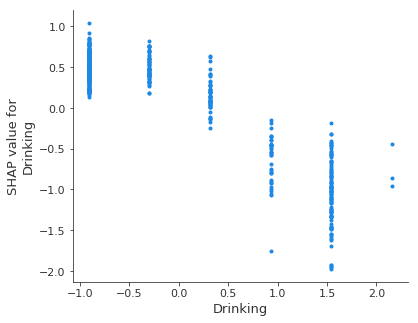

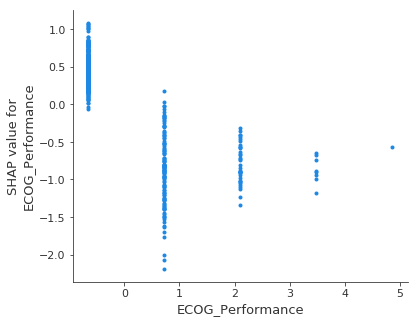

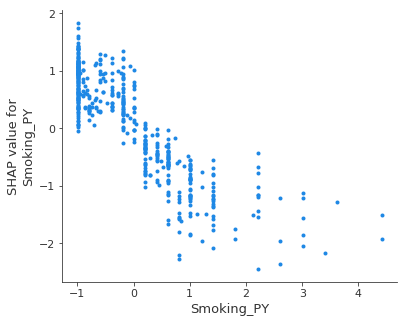

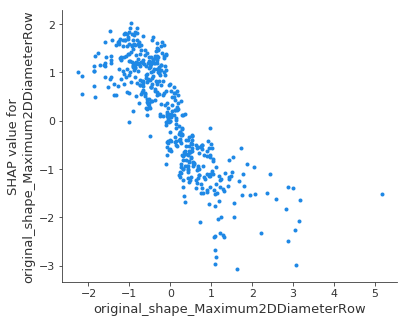

In [4]:
#添加独立验证实验
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection._validation import cv_results_fth
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
import shap
from sklearn.metrics import precision_score, roc_curve, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR, SVC
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
from sklearn.linear_model import LassoCV, LogisticRegression,Lasso, LassoLarsCV, MultiTaskLasso, MultiTaskLassoCV
import warnings

warnings.filterwarnings('ignore')
shap.initjs()

def dataprocessing(data):
    dummies_Sex = pd.get_dummies(data['Sex'], prefix='Sex')
    dummies_Sex = pd.DataFrame(dummies_Sex)

    ECOG = {'ECOG 0': 0, 'ECOG 1': 1, 'ECOG 2': 2, 'ECOG 3': 3, 'ECOG 4': 4}
    data["ECOG_Performance"] = data["ECOG_Performance"].map(ECOG)

    smoker = {'Non-smoker': 0, 'Ex-smoker': 1, 'Current': 2}
    data["Smoking"] = data["Smoking"].map(smoker)

    drinker = {'non-drinker': 0, 'light': 1, 'Moderate': 2, 'ex-drinker': 3, 'heavy': 4, 'unknown': 5}
    data["Drinking"] = data["Drinking"].map(drinker)

    sub = {'post wall': 1, 'Tonsillar Fossa': 2, 'Base of Tongue': 3, 'Tonsil ': 4,
           'Tonsil Pillar ': 5, 'Soft Palate ': 6, 'Vallecula': 7, 'lat wall': 0}
    data["Subsite"] = data["Subsite"].map(sub)

    T = {'T1': 1, 'T2': 2, 'T3': 3, 'T3 (2) ': 4, 'T4a': 5, 'T4b': 0}
    data["T"] = data["T"].map(T)

    N = {'N0': 0, 'N1': 1, 'N2a': 2, 'N2b': 3, 'N2c': 4, 'N3': 5}
    data["N"] = data["N"].map(N)

    M = {'M0': 0}
    data["M"] = data["M"].map(M)

    stage = {'I': 0, 'II': 1, 'III': 2, 'IVA': 3, 'IVB': 4}
    data["Stage"] = data["Stage"].map(stage)

    Hpv = {'  Negative': 0, '  positive': 1}
    data["HPVp16status"] = data["HPVp16status"].map(Hpv)

    Che = {'none': 0, 'Yes': 1}
    data["Chemotherapy"] = data["Chemotherapy"].map(Che)

    RT = {'IMRT': 0, 'IMRT-ipsilat': 1}
    data["RT_Tech"] = data["RT_Tech"].map(RT)

    Status = {'Dead': 0, 'Alive': 1}
    data["Status"] = data["Status"].map(Status)

    data.drop(['PatientID', 'Sex', 'Ds_Site', 'Path', 'Primary_Treatment', 'Cause_of_Death',
               'Local_Failure', 'local_failure(days)', 'Regional_Failure', 'regional_failure(days)',
               'Distant_Failure', 'distant_failure (days)', 'Second_Primary', '2nd_cancer_(days)',
               'PMID', 'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
               'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python',
               'diagnostics_Configuration_Settings', 'diagnostics_Configuration_EnabledImageTypes',
               'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Dimensionality',
               'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
               'diagnostics_Image-original_Mean',
               'diagnostics_Image-original_Minimum', 'diagnostics_Image-original_Maximum',
               'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing',
               'diagnostics_Mask-original_Size',
               'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_VoxelNum',
               'diagnostics_Mask-original_VolumeNum', 'diagnostics_Mask-original_CenterOfMassIndex',
               'diagnostics_Mask-original_CenterOfMass'

               ], axis=1, inplace=True)

    data_df = pd.concat([data, dummies_Sex], axis=1)
    return data_df


# 处理训练数据
train_data_orginal = 'train_data.csv'
train_data_orginal = pd.read_csv(train_data_orginal)
dataprocessing(train_data_orginal)
train_data_orginal = train_data_orginal.fillna(0)

Train_X = train_data_orginal.drop(['FU', 'Status'], axis=1)
# Train_X = data_train.drop(['Status'],axis=1)
Train_y = train_data_orginal.pop('FU').values
Train_z = train_data_orginal.pop('Status').values
colNames = Train_X.columns
#标准化
stdScale = StandardScaler().fit(Train_X)  ## 生成规则
Train_X = stdScale.transform(Train_X)  ## 将规则应用于训练集
Train_X = pd.DataFrame(Train_X)
Train_X.columns = colNames

x_train, x_test, y_train, y_test = train_test_split(Train_X, Train_z, test_size=0.1, random_state=1)
print(x_train.shape)
print("--------------------------------")
print(x_test)
# 用新的数据集进行五折交叉验证
model_xgb = xgb.XGBClassifier()
cv_results = cv_results_fth(model_xgb, x_train, y_train, cv=10, scoring='roc_auc')
# print(cv_results)
models = cv_results['estimator']
print(cv_results['test_score'])
# print(np.max(cv_results['test_score']))
print((cv_results['test_score']).mean())



auc_sum = 0
for model in models:
    y_pred = model.predict(x_test)
    auc_score = roc_auc_score(y_test,y_pred)
    auc_sum += auc_score
    print(auc_score)
print("---------------------------------------------------------")
print(auc_sum/10.0)
# lasso降维
# alphas = np.logspace(-1,3, 50)
# [0.1,1,0.001,10]
# model_lassoCV = LassoCV().fit(x_train, y_train)
# print(model_lassoCV.coef_)
# print("model_lassoCV.alpha_", model_lassoCV.alpha_)
# coef_fu = pd.Series(model_lassoCV.coef_, index=Train_X.columns)
# print("Lasso picked " + str(sum(coef_fu != 0)) + " variables and eliminated the other " + str(sum(coef_fu == 0)))
# index_fu = coef_fu[coef_fu != 0].index
# # 用features存储lasso降维后的特征
# features = coef_fu[coef_fu != 0]
# pd.DataFrame(features).to_csv('features.csv')
# print(features.keys())

features = pd.read_csv('features_23.csv')
features = pd.DataFrame(features)
# print(features.values)
features_new = features.values
# features_new = features.keys()
#新的
x_train_lasso = pd.DataFrame()
x_test_lasso = pd.DataFrame()
for feature in features_new:
    x_train_lasso[feature] = x_train[feature]
    x_test_lasso[feature] = x_test[feature]
print(x_train_lasso.shape)
print(x_test_lasso)
model_xgb = xgb.XGBClassifier()
cv_results = cv_results_fth(model_xgb, x_train_lasso, y_train, cv=10, scoring='roc_auc')
# print(cv_results)
models = cv_results['estimator']
print(cv_results['test_score'])
# print(np.max(cv_results['test_score']))
print((cv_results['test_score']).mean())



auc_sum = 0
for model in models:
    y_pred = model.predict(x_test_lasso)
    auc_score = roc_auc_score(y_test, y_pred)
    auc_sum += auc_score
    print(auc_score)
print("---------------------------------------------------------")
print(auc_sum/10.0)



#原来的
# # features_new = features.keys()
# # 用Train_new保存只包含新特征集合的数据集
# Train_newX = pd.DataFrame()
# for feature in features_new:
#     Train_newX[feature] = Train_X[feature]
# print(Train_newX)
#
# x_train, x_test, y_train, y_test = train_test_split(Train_newX, Train_z, test_size=0.1, random_state=1)
# print(x_train.shape)
# print("--------------------------------")
# print(x_test)
# # 用新的数据集进行五折交叉验证
# model_xgb = xgb.XGBClassifier()
# cv_results = cv_results_fth(model_xgb, x_train, y_train, cv=5, scoring='roc_auc')
# # print(cv_results)
# models = cv_results['estimator']
# print(cv_results['test_score'])
# # print(np.max(cv_results['test_score']))
# print((cv_results['test_score']).mean())
#
#
#
# auc_sum = 0
# for model in models:
#     y_pred = model.predict(x_test)
#     auc_score = roc_auc_score(y_test,y_pred)
#     auc_sum += auc_score
#     print(auc_score)
# print("---------------------------------------------------------")
# print(auc_sum/5.0)



# 使用序列浮动选择算法选择最优特征子集
# model_xgb = xgb.XGBClassifier()
# result_features = {}
# result_score = {}
# for i in range(1, 25):
#     sfs = SFS(model_xgb, k_features=i, forward=False,floating=True, scoring='roc_auc', cv=5, n_jobs=-1)
#     sfs = sfs.fit(x_train, y_train)
#     result_features[i] = sfs.k_feature_names_
#     result_score[i] = sfs.k_score_
#
# result_features = sorted(result_features.items(), key=lambda x: x[0], reverse=False)
#
# print("result_features:------------------------------------------")
# print(np.array(result_features))
# print("result-score----------------------------------------------")
# result_score_1 = dict(sorted(result_score.items(), key=lambda x: x[0], reverse=False))
# # x = result_score_1.keys()
# # y = result_score_1.values()
# # plt.plot(x,y)
# # plt.show()
# print(np.array(result_score_1))
#
# result_score_2 = zip(result_score.keys(), result_score.values())
# c = sorted(result_score_2)
# print(np.array(c))

# 最优特征子集
#由于每次运行序列浮动算法时间较久，下面直接给features_best赋值之前跑出来的最优特诊子集
# features_best = ['Ageatdiagnosis', 'Smoking_PY', 'Drinking', 'HPVp16status', 'Chemotherapy', 'original_shape_Maximum2DDiameterRow', 'wavelet-HLL_glszm_SmallAreaEmphasis', 'wavelet-LLL_firstorder_Median', 'wavelet-LLL_glrlm_GrayLevelNonUniformity', 'exponential_firstorder_Mean', 'lbp-3D-k_gldm_LargeDependenceHighGrayLevelEmphasis', 'squareroot_glrlm_GrayLevelNonUniformity']
# features_best =  ['Ageatdiagnosis', 'ECOG_Performance', 'Smoking_PY', 'Drinking', 'HPVp16status', 'Chemotherapy', 'original_shape_Maximum2DDiameterRow', 'original_glrlm_GrayLevelNonUniformity', 'wavelet-HLL_glszm_SmallAreaEmphasis', 'wavelet-LLL_firstorder_Median', 'wavelet-LLL_glrlm_GrayLevelNonUniformity', 'exponential_firstorder_Mean', 'lbp-3D-m1_glszm_GrayLevelNonUniformity', 'lbp-3D-m1_glszm_SizeZoneNonUniformityNormalized', 'lbp-3D-m1_glszm_ZoneEntropy', 'lbp-3D-m2_glszm_GrayLevelNonUniformity', 'lbp-3D-k_gldm_LargeDependenceHighGrayLevelEmphasis']
# 用Train_best保存只包含最优特征集合的数据集

# features_best =['Ageatdiagnosis', 'Smoking_PY', 'Drinking', 'Chemotherapy', 'original_shape_Maximum2DDiameterRow', 'wavelet-HLL_glszm_SmallAreaEmphasis', 'wavelet-HHL_glszm_GrayLevelNonUniformityNormalized', 'wavelet-LLL_firstorder_Median', 'exponential_firstorder_Mean', 'squareroot_glrlm_GrayLevelNonUniformity']

# features_best = ['Ageatdiagnosis', 'ECOG_Performance', 'Smoking_PY', 'Drinking', 'Chemotherapy', 'original_shape_Maximum2DDiameterRow', 'wavelet-HLH_firstorder_Skewness', 'wavelet-HHL_glszm_GrayLevelNonUniformityNormalized', 'exponential_firstorder_Mean']

features_best = ['Ageatdiagnosis', 'ECOG_Performance', 'Smoking_PY', 'Drinking', 'HPVp16status', 'Chemotherapy', 'original_shape_Maximum2DDiameterRow', 'wavelet-HLH_firstorder_Median', 'wavelet-HHL_glszm_GrayLevelNonUniformityNormalized', 'wavelet-LLL_firstorder_Median', 'exponential_firstorder_Mean', 'lbp-3D-k_glszm_SmallAreaLowGrayLevelEmphasis', 'lbp-3D-k_gldm_LargeDependenceHighGrayLevelEmphasis']

x_train_best = pd.DataFrame()
x_test_best = pd.DataFrame()
for feature in features_best:
    x_train_best[feature] = x_train[feature]
    x_test_best[feature] = x_test[feature]
print(x_train_best.shape)
print(x_test_best)


# x_train, x_test, y_train, y_test = train_test_split(train_best, Train_z, test_size=0.3)
# 用新的数据集进行五折交叉验证
model_xgb = xgb.XGBClassifier()
cv_results = cv_results_fth(model_xgb, x_train_best, y_train, cv=10, scoring='roc_auc')
# print(cv_results)
models = cv_results['estimator']
print(cv_results['test_score'])
# print(np.max(cv_results['test_score']))
print((cv_results['test_score']).mean())


auc_sum = 0
for model in models:
    y_pred = model.predict(x_test_best)
    auc_score = roc_auc_score(y_test,y_pred)
    auc_sum += auc_score
    print(auc_score)
print("---------------------------------------------------------")
print(auc_sum/10.0)

# shap解释
# for i in range(0,5):
#     explainer = shap.TreeExplainer(models[i])
#     shap_values = explainer.shap_values(train_best)
#     shap.summary_plot(shap_values, train_best)
# X_train_summary = shap.kmeans(train_best, 10)
# train_best = train_best.values
# explainer = shap.KernelExplainer(models[3].predict,train_best)



explainer = shap.TreeExplainer(models[9])
shap_values = explainer.shap_values(x_train_best)
shap.summary_plot(shap_values, x_train_best)
shap.summary_plot(shap_values, x_train_best.columns, plot_type="bar")
# print("单个解释")
# print(explainer.expected_value)
# print(models[3].predict(train_best))
# shap.force_plot(explainer.expected_value, shap_values[3],train_best.columns)
# 部分依赖图
shap.dependence_plot("Ageatdiagnosis", shap_values, x_train_best, interaction_index=None)
shap.dependence_plot("Drinking", shap_values, x_train_best, interaction_index=None)
shap.dependence_plot("ECOG_Performance", shap_values, x_train_best, interaction_index=None)
shap.dependence_plot("Smoking_PY", shap_values, x_train_best, interaction_index=None)
shap.dependence_plot("original_shape_Maximum2DDiameterRow", shap_values, x_train_best, interaction_index=None)


# shap.summary_plot(shap_values, train_best.columns, plot_type="bar")
# len=len(index_fu)
# print(len)
# X_futrain=X_futrain[index_fu]
# X_futest=X_futest[index_fu]
# Independent_fu=Independent_fu[index_fu]# print(Train_X.shape)
# 方差过滤
# selector = VarianceThreshold(threshold=0.5)
# shit_new = selector.fit_transform(Train_X)
# select_name_index = selector.get_support(indices=True)
# select_name = []
# for i in select_name_index:
#     select_name.append(colNames[i])
# print(shit_new.shape)
# # print(select_name)
# train_new = pd.DataFrame()
# for name in select_name:
#     train_new[name] = Train_X[name]
#
# print(train_new)


